In [22]:
#Загрузим необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

,0
0,39
1,36
2,60
3,21
4,27


0    1
1    0
2    1
3    1
4    1
dtype: int32

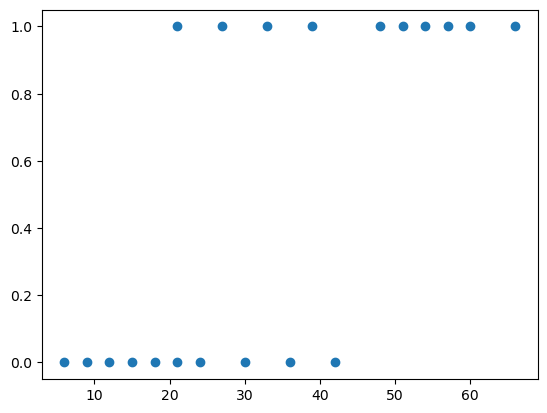

In [29]:
#Исходные данные: x - срок обслуживания, Y - класс риска
x = pd.DataFrame(np.array([39, 36, 60, 21, 27, 12, 51, 57, 54, 42, 18, 9, 48, 66, 6, 30, 24, 33, 15, 21]))
Y = pd.Series(np.array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0]))
display(x.head(), Y.head())
plt.scatter(x, Y)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [42]:
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.35, random_state = 123)
print(x.shape, Y.shape, x_train.shape, x_test.shape, Y_train.shape, Y_test.shape)

(20, 1) (20,) (13, 1) (7, 1) (13,) (7,)


In [43]:
logreg = LogisticRegression(max_iter = 500)
logreg.fit(x_train, Y_train)

LogisticRegression(max_iter=500)

In [44]:
Y_pred_train.shape

(18,)

Recall (train) = 0.8333333333333334
Precision (train) = 0.8333333333333334
F1 (train) = 0.8333333333333334
Accuracy (train) = 0.8461538461538461
AUC (train) = 0.8452380952380953


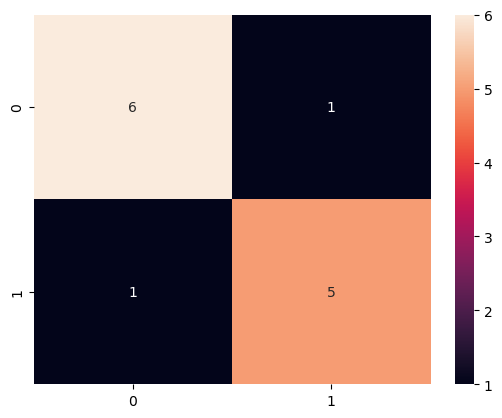

In [45]:
Y_pred_proba = logreg.predict_proba(x_train)
Y_pred_train = logreg.predict(x_train)
sns.heatmap(confusion_matrix(Y_train, Y_pred_train), annot = True)
print('Recall (train) =', recall_score(Y_train, Y_pred_train))
print('Precision (train) =', precision_score(Y_train, Y_pred_train))
print('F1 (train) =', f1_score(Y_train, Y_pred_train))
print('Accuracy (train) =', accuracy_score(Y_train, Y_pred_train))
print('AUC (train) =', roc_auc_score(Y_train, Y_pred_train))

Recall (test) = 0.5
Precision (test) = 1.0
F1 (test) = 0.6666666666666666
Accuracy (test) = 0.7142857142857143
AUC (test) = 0.75


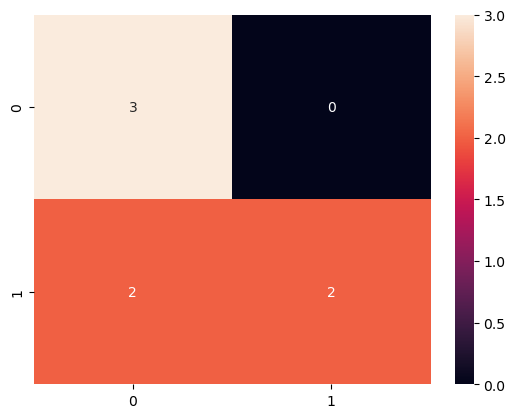

In [47]:
Y_pred_test = logreg.predict(x_test)
sns.heatmap(confusion_matrix(Y_test, Y_pred_test), annot = True)
print('Recall (test) =', recall_score(Y_test, Y_pred_test))
print('Precision (test) =', precision_score(Y_test, Y_pred_test))
print('F1 (test) =', f1_score(Y_test, Y_pred_test))
print('Accuracy (test) =', accuracy_score(Y_test, Y_pred_test))
print('AUC (test) =', roc_auc_score(Y_test, Y_pred_test))

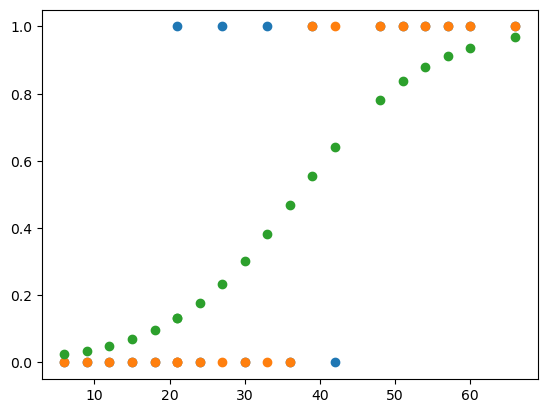

In [53]:
plt.scatter(x, Y)
Y_pred = logreg.predict(x)
Y_proba = logreg.predict_proba(x)
plt.scatter(x, Y_pred)
plt.scatter(x, Y_proba[:, 1])

В файле insclass_train.csv для 151 406 договоров страхования транспортных средств известны значения ряда признаков, в том числе пол, возраст, стаж вождения и коэффициент бонус-малус водителя, тип, марка, модель, год выпуска, страна – производитель, мощность и объем двигателя, а также признак target, равный 1, если заключение договора с клиентом является рисковым, и 0 в противном случае (файл insclass_train.csv).

#### Требуется построить модель  логистической регрессии, предсказывающую значение признака target для 22 624 договоров из тестового набора данных (файл insclass_test.csv).

В обучающем наборе данных для каждого договора известны следующие поля:

variable_1 - агрегированный коэффициент бонус-малус (повышающий или понижающий стоимость полиса в зависимости от аварийности в предыдущие периоды);
variable_2 - индикатор расторжения договора по инициативе страхователя (клиента);
variable_3 - индикатор расторжения договора по инициативе страховщика (страховой компании);
variable_4 - идентификатор года выпуска транспортного средства;
variable_5 - идентификатор страны - производителя транспортного средства;
variable_6 - мощность двигателя в лошадиных силах;
variable_7 - объем двигателя в куб. см;
variable_8 - идентификатор стороны расположения руля (левый или правый);
variable_9 - пробег транспортного средства, покрываемый гарантией производителя;
variable_10 - индикатор действия гарантии на транспортное средство;
variable_11 - "мультидрайв" - индикатор допуска к управлению транспортным средством более одного водителя;
variable_12 - возраст транспортного средства (в мес.);
variable_13 - возраст водителя с максимальным стажем;
variable_14 - коэффициент возраст-стаж;
variable_15 - коэффициент краткосрочности;
variable_16 - коэффициент мощности;
variable_17 - коэффициент "мультидрайв";
variable_18 - территориальный коэффициент;
variable_19 - коэффициент "КНДР";
variable_20 - идентификатор канала продаж;
variable_21 - марка транспортного средства;
variable_22 - модель транспортного средства;
variable_23 - индикатор отечественных транспортных средств;
variable_24 - пол водителя с максимальным коэффициентом "возраст-стаж";
variable_25 - индикатор пролонгации;
variable_26 - индикатор совпадения собственника транспортного средства и водителя;
variable_27 - стаж водителя с максимальным коэффициентом "возраст-стаж";
variable_28 - тип транспортного средства;
target - класс риска, равный 1, если заключение договора с клиентом является рисковым, и 0 в противном случае.